In [26]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [33]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [34]:
ps

,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,cell type,...,Plate,Comments,Stacis call for reconstructions,Stacis call for class,Confidence,Bad dates,Notes.1,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,140604,BRL,NaN,WT - 140604_01,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140606,BRL,NaN,WT - 140606_01,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,140606,BRL,NaN,WT - 140606_02,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140610,BRL,NaN,WT - 140610_01a,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140610,BRL,NaN,WT - 140610_01,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,140610,BRL,NaN,WT - 140610_03,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,140610,BRL,NaN,WT - 140610_04-5a,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,140610,BRL,NaN,WT - 140610_04-5b,x,NaN,NaN,RNAseq - pilot,NaN,tdt-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,140611,BRL,NaN,Rorb - 140611_01,x,NaN,NaN,RNAseq - pilot,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,140611,BRL,NaN,Rorb - 140611_02,x,NaN,NaN,RNAseq - pilot,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ps = ps[["Date", "User", "Internal version", ">400" , "Ratio", "SM_QC_PF" , "PCR cycles"]]
ps.dropna(subset = [">400"], inplace = True)
ps["User"] = ps["User"].astype("category")
#ps[">400"] = ps[">400"].astype("category")
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["PCR cycles"] == 21]
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps

c:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

,Date,User,Internal version,>400,Ratio,SM_QC_PF,PCR cycles
4968,2017-04-19,P2,AiV2,8.000,0.41,fail,21.0
4969,2017-04-19,P2,AiV2,461.000,0.54,pass,21.0
4970,2017-04-19,P2,AiV2,1.000,1,fail,21.0
4971,2017-04-19,P2,AiV2,979.000,0.71,pass,21.0
4972,2017-04-19,P2,AiV2,456.000,0.55,pass,21.0
4973,2017-04-19,P2,AiV2,1193.000,0.81,pass,21.0
4974,2017-04-19,P2,AiV2,1319.000,0.59,pass,21.0
4975,2017-04-19,P2,AiV2,1567.000,0.71,pass,21.0
4978,2017-04-19,P6,AiV2,411.000,0.33,fail,21.0
4979,2017-04-19,P6,AiV2,751.000,0.51,pass,21.0


In [36]:
ps['Internal version'].value_counts()

AiV2                   1424
AiV2-50uM alexa 488     474
Name: Internal version, dtype: int64

In [37]:
def gen_filter(df, col, cond):
    filtr = df[df[col] == cond]
    return filtr

In [40]:
ps2 = ps[ps[">400"] < 8000]
ps2.head()

,Date,User,Internal version,>400,Ratio,SM_QC_PF,PCR cycles
4968,2017-04-19,P2,AiV2,8.0,0.41,fail,21.0
4969,2017-04-19,P2,AiV2,461.0,0.54,pass,21.0
4970,2017-04-19,P2,AiV2,1.0,1,fail,21.0
4971,2017-04-19,P2,AiV2,979.0,0.71,pass,21.0
4972,2017-04-19,P2,AiV2,456.0,0.55,pass,21.0


In [41]:
standard_internal= gen_filter(ps2, "Internal version", "AiV2")
standard_internal.head()

,Date,User,Internal version,>400,Ratio,SM_QC_PF,PCR cycles
4968,2017-04-19,P2,AiV2,8.0,0.41,fail,21.0
4969,2017-04-19,P2,AiV2,461.0,0.54,pass,21.0
4970,2017-04-19,P2,AiV2,1.0,1,fail,21.0
4971,2017-04-19,P2,AiV2,979.0,0.71,pass,21.0
4972,2017-04-19,P2,AiV2,456.0,0.55,pass,21.0


In [42]:
Alexa_internal= gen_filter(ps2, "Internal version", "AiV2-50uM alexa 488")
Alexa_internal

,Date,User,Internal version,>400,Ratio,SM_QC_PF,PCR cycles
7094,2017-08-29,P8,AiV2-50uM alexa 488,637.000,172,pass,21.0
7095,2017-08-29,P8,AiV2-50uM alexa 488,156.000,92,pass,21.0
7096,2017-08-30,P8,AiV2-50uM alexa 488,371.000,415,pass,21.0
7099,2017-08-30,P8,AiV2-50uM alexa 488,99.000,91,pass,21.0
7101,2017-08-30,P8,AiV2-50uM alexa 488,248.000,296,pass,21.0
7108,2017-08-31,P2,AiV2-50uM alexa 488,1648.000,0.75,pass,21.0
7109,2017-08-31,P2,AiV2-50uM alexa 488,1405.000,0.74,pass,21.0
7110,2017-08-31,P2,AiV2-50uM alexa 488,1053.000,0.69,pass,21.0
7113,2017-08-31,P8,AiV2-50uM alexa 488,1633.000,0.71,pass,21.0
7114,2017-08-31,P8,AiV2-50uM alexa 488,513.000,0.44,pass,21.0


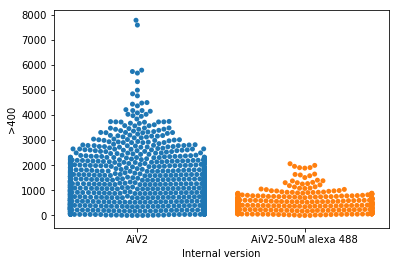

In [43]:
sns.swarmplot(x='Internal version', y='>400', data=ps2)

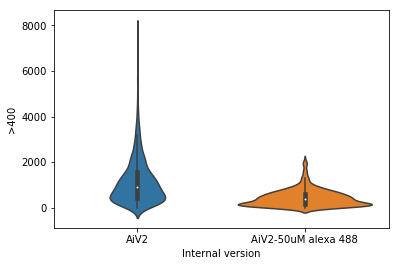

In [44]:
sns.violinplot(x='Internal version', y='>400', data=ps2)